<a href="https://colab.research.google.com/github/Prabin712/2501928_PrabinKunwar_Assignment-I/blob/main/2501928_PrabinKunwar_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv("/content/drive/My Drive/Final-Assignement_Concept and technology of ai/forecast_data.csv")

In [45]:
df.head()

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,state,city
0,9,10/15/2021 0:00,23.2,73.8,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,6.8,41,NE,...,0,0,0,0,10.0,6,8.9,14.4,Andhra Pradesh,Amaravati
1,1634239800,10/15/2021 1:00,23.0,73.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.1,6.6,34,NE,...,0,0,0,0,10.0,6,8.6,13.9,Andhra Pradesh,Amaravati
2,1634243400,10/15/2021 2:00,22.7,72.9,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.0,6.4,28,NNE,...,0,0,0,0,10.0,6,8.4,13.4,Andhra Pradesh,Amaravati
3,1634247000,10/15/2021 3:00,22.5,72.5,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.8,6.1,22,NNE,...,0,0,0,0,10.0,6,8.1,13.0,Andhra Pradesh,Amaravati
4,1634250600,10/15/2021 4:00,22.3,72.1,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.7,6.0,23,NNE,...,0,0,0,0,10.0,6,7.9,12.7,Andhra Pradesh,Amaravati


In [69]:
df.tail()

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
29563,1634909400,25.7,78.3,0,3.0,4.8,334,1010,29.84,0.0,...,17.6,63.7,0,0,0,0,10.0,6,6.0,9.7
29564,1634913000,24.8,76.6,0,3.1,4.9,342,1011,29.85,0.0,...,17.2,62.9,0,0,0,0,10.0,6,6.3,10.1
29565,1634916600,23.9,75.0,0,3.1,5.0,351,1012,29.87,0.0,...,16.7,62.1,0,0,0,0,10.0,6,6.5,10.4
29566,1634920200,23.3,74.0,0,2.8,4.4,237,1012,29.87,0.0,...,17.1,62.8,0,0,0,0,10.0,6,5.7,9.2
29567,1634923800,22.8,73.0,0,2.4,3.8,123,1012,29.87,0.0,...,17.5,63.5,0,0,0,0,10.0,6,5.0,8.0


In [46]:
df.shape

(29568, 34)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_epoch      29568 non-null  int64  
 1   time            29568 non-null  object 
 2   temp_c          29568 non-null  float64
 3   temp_f          29568 non-null  float64
 4   is_day          29568 non-null  int64  
 5   condition       29568 non-null  object 
 6   wind_mph        29568 non-null  float64
 7   wind_kph        29568 non-null  float64
 8   wind_degree     29568 non-null  int64  
 9   wind_dir        29568 non-null  object 
 10  pressure_mb     29568 non-null  int64  
 11  pressure_in     29568 non-null  float64
 12  precip_mm       29568 non-null  float64
 13  precip_in       29568 non-null  float64
 14  humidity        29568 non-null  int64  
 15  cloud           29568 non-null  int64  
 16  feelslike_c     29568 non-null  float64
 17  feelslike_f     29568 non-null 

In [48]:
df.describe()

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
count,2.956800e+04,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,...,29568.000000,29568.000000,29568.000000,29568.000000,29568.0,29568.0,29568.000000,29568.000000,29568.000000,29568.000000
mean,1.634525e+09,25.152307,77.273793,0.477070,5.077486,8.169619,177.818452,1008.341112,29.775472,0.101552,...,18.650761,65.571567,0.089928,12.155202,0.0,0.0,9.263460,5.488433,7.947697,12.791274
std,9.508038e+06,4.797702,8.635461,0.499482,2.847123,4.582337,103.545331,3.438631,0.101294,0.406883,...,5.715956,10.288746,0.286084,24.999675,0.0,0.0,1.986747,1.281815,4.141102,6.665310
min,9.000000e+00,1.500000,34.700000,0.000000,0.000000,0.000000,0.000000,999.000000,29.490000,0.000000,...,-8.200000,17.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.634408e+09,22.500000,72.600000,0.000000,3.100000,4.900000,83.000000,1006.000000,29.690000,0.000000,...,16.000000,60.800000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,4.900000,7.900000
50%,1.634580e+09,25.100000,77.200000,0.000000,4.500000,7.200000,174.000000,1008.000000,29.780000,0.000000,...,20.400000,68.700000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,7.300000,11.800000
75%,1.634753e+09,28.100000,82.600000,1.000000,6.500000,10.400000,273.000000,1011.000000,29.850000,0.040000,...,22.900000,73.300000,0.000000,3.000000,0.0,0.0,10.000000,6.000000,10.400000,16.700000
max,1.634958e+09,39.300000,102.700000,1.000000,22.400000,36.000000,359.000000,1021.000000,30.160000,20.930000,...,30.200000,86.400000,1.000000,94.000000,0.0,0.0,10.000000,6.000000,32.700000,52.600000


In [49]:
df = df.drop(columns=[
    "condition",
    "wind_dir",
    "city",
    "state",
    "time"
])


In [72]:
df.isnull().sum()

,0
time_epoch,0
temp_c,0
temp_f,0
is_day,0
wind_mph,0
wind_kph,0
wind_degree,0
pressure_mb,0
pressure_in,0
precip_mm,0


In [73]:
df.duplicated().sum()

np.int64(4437)

In [51]:
df = df.dropna()

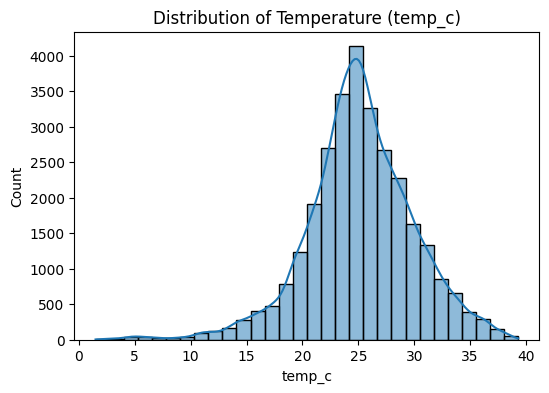

In [52]:
plt.figure(figsize=(6,4))
sns.histplot(df["temp_c"], bins=30, kde=True)
plt.title("Distribution of Temperature (temp_c)")
plt.show()

In [ ]:
# This figure shows the distribution of the `temp_c` variable.
# It helps to visualize how temperature values are spread across the dataset,
# including the range, frequency, and overall shape of the distribution.


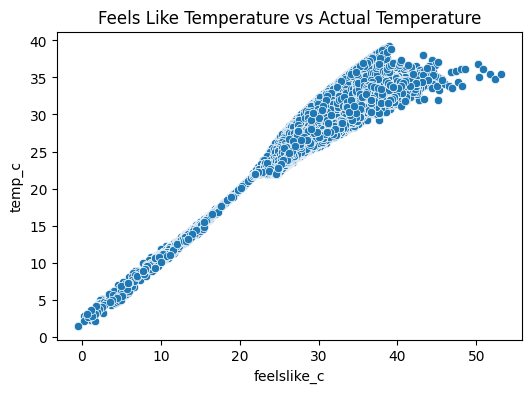

In [79]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="feelslike_c", y="temp_c", data=df)
plt.title("Feels Like Temperature vs Actual Temperature")
plt.show()


In [ ]:
# This figure shows the relationship between 'feelslike_c' and 'temp_c'.
# It helps to visualize how the "feels like" temperature compares to the actual temperature,
# highlighting patterns, trends, and any deviations between the two variables.

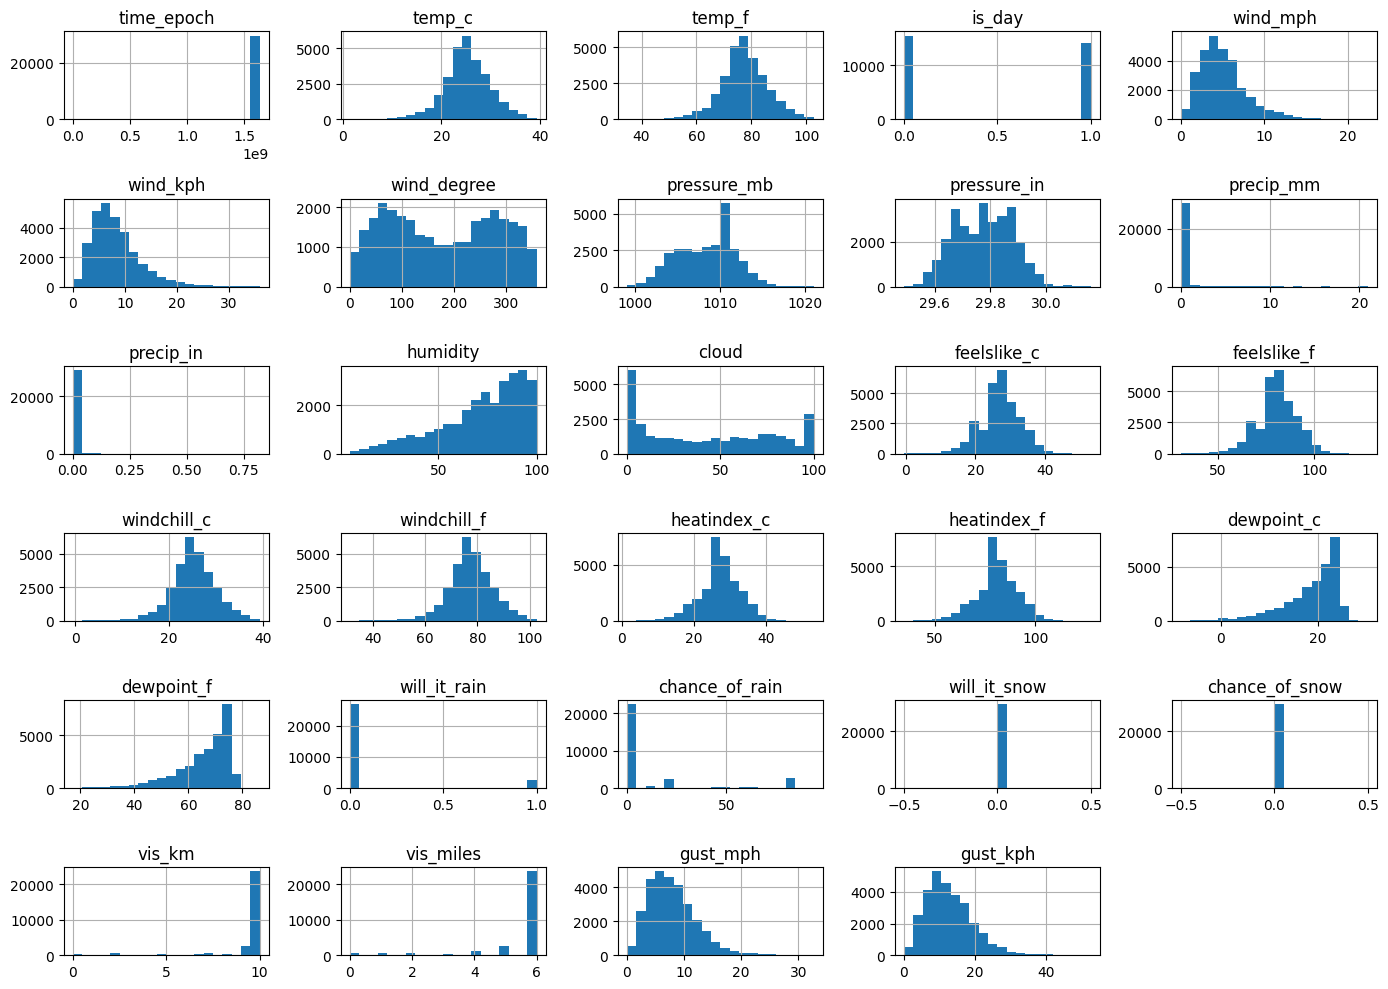

In [81]:
numerical_cols = df.columns

df[numerical_cols].hist(figsize=(14,10), bins=20)
plt.tight_layout()
plt.show()


In [ ]:
# This figure shows histograms for all numerical columns in the dataset.
# It helps to understand the distribution, range, and frequency of values
# for each numerical feature at a glance.


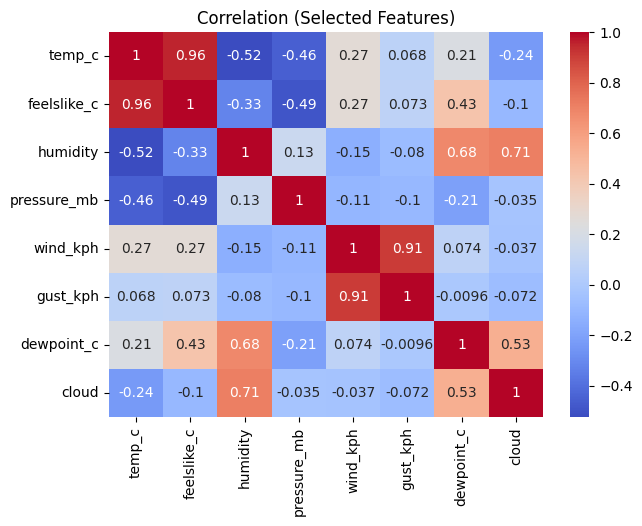

In [80]:
important_cols = [
    "temp_c",
    "feelslike_c",
    "humidity",
    "pressure_mb",
    "wind_kph",
    "gust_kph",
    "dewpoint_c",
    "cloud"
]

plt.figure(figsize=(7,5))
sns.heatmap(df[important_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation (Selected Features)")
plt.show()

In [ ]:
# This figure shows the correlation matrix of selected important features.
# The heatmap visualizes how strongly each feature is related to the others,
# with colors indicating the strength and direction of correlations.
# Annot=True displays the correlation values on the heatmap for clarity.


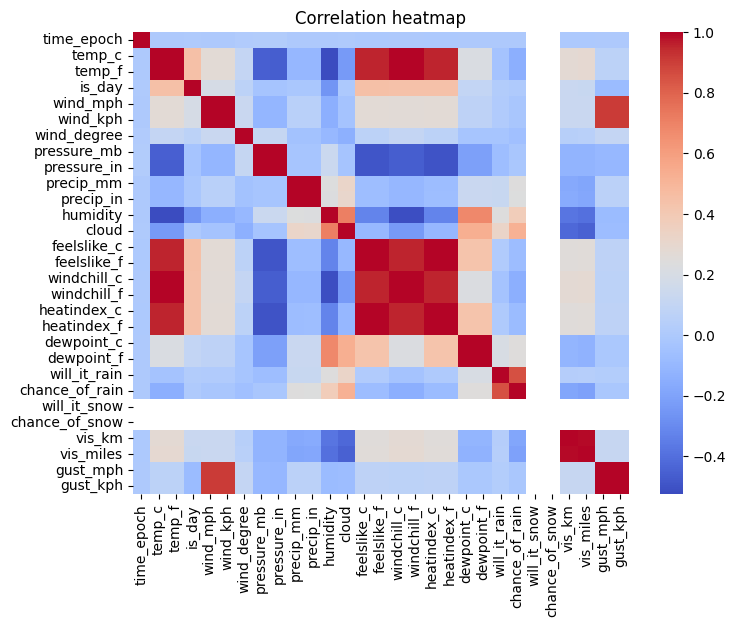

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()


In [82]:
# This figure shows the correlation heatmap of all numerical features in the dataset.
# It helps to understand how each feature is related to the others,
# with colors indicating the strength and direction of correlations.


In [54]:
X = df.drop("temp_c", axis=1)
y = df["temp_c"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [56]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
nn = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    max_iter=500,
    random_state=42
)

nn.fit(X_train, y_train)

pred_nn = nn.predict(X_test)

mae_nn = mean_absolute_error(y_test, pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, pred_nn))
r2_nn = r2_score(y_test, pred_nn)

mae_nn, rmse_nn, r2_nn


(0.07123607228487867, np.float64(0.09995974999915962), 0.9995511294597899)

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr)

mae_lr, rmse_lr, r2_lr


(0.0014321380394035086, np.float64(0.005567657615619615), 0.9999986074338914)

In [59]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)

mae_rf, rmse_rf, r2_rf


(0.0006988501860308311, np.float64(0.013315917636264165), 0.9999920345011166)

In [41]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)

grid_rf.fit(X_train, y_train)

grid_rf.best_params_


{'max_depth': 20, 'n_estimators': 100}

In [60]:
grid_rf.best_score_

np.float64(-6.958307637583104e-05)

In [61]:
best_rf = grid_rf.best_estimator_

In [62]:
rfe = RFE(LinearRegression(), n_features_to_select=8)
rfe.fit(X_train, y_train)

selected_features = rfe.support_
selected_features

array([False,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [63]:
X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

In [64]:
lr_final = LinearRegression()
lr_final.fit(X_train_sel, y_train)

pred_lr_final = lr_final.predict(X_test_sel)

mae_lr_f = mean_absolute_error(y_test, pred_lr_final)
rmse_lr_f = np.sqrt(mean_squared_error(y_test, pred_lr_final))
r2_lr_f = r2_score(y_test, pred_lr_final)

mae_lr_f, rmse_lr_f, r2_lr_f

(0.0013348275412855904, np.float64(0.005558833317099493), 0.9999986118446084)

In [65]:
best_rf.fit(X_train_sel, y_train)

pred_rf_final = best_rf.predict(X_test_sel)

mae_rf_f = mean_absolute_error(y_test, pred_rf_final)
rmse_rf_f = np.sqrt(mean_squared_error(y_test, pred_rf_final))
r2_rf_f = r2_score(y_test, pred_rf_final)

mae_rf_f, rmse_rf_f, r2_rf_f

(0.0006394994927604998, np.float64(0.011998548553862244), 0.9999935326225626)

In [66]:
cv_lr = cross_val_score(
    lr_final,
    X_train_sel,
    y_train,
    cv=5,
    scoring="neg_mean_squared_error"
)

cv_rf = cross_val_score(
    best_rf,
    X_train_sel,
    y_train,
    cv=5,
    scoring="neg_mean_squared_error"
)

cv_lr_rmse = np.sqrt(-cv_lr.mean())
cv_rf_rmse = np.sqrt(-cv_rf.mean())

cv_lr_rmse, cv_rf_rmse

(np.float64(0.005798466846720565), np.float64(0.007886266374052361))

In [67]:
results = pd.DataFrame({
    "Model": ["Neural Network", "Linear Regression (Final)", "Random Forest (Final)"],
    "MAE": [mae_nn, mae_lr_f, mae_rf_f],
    "RMSE": [rmse_nn, rmse_lr_f, rmse_rf_f],
    "R2": [r2_nn, r2_lr_f, r2_rf_f],
    "CV_RMSE": [np.nan, cv_lr_rmse, cv_rf_rmse]
})

results

,Model,MAE,RMSE,R2,CV_RMSE
0,Neural Network,0.071236,0.099960,0.999551,NaN
1,Linear Regression (Final),0.001335,0.005559,0.999999,0.005798
2,Random Forest (Final),0.000639,0.011999,0.999994,0.007886
